In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display
import datetime
%matplotlib inline
display.set_matplotlib_formats('svg')
plt.style.use('ggplot') #设置ggplot
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user-behav/UserBehavior.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  if sys.path[0] == "":


In [2]:
df = pd.read_csv('/kaggle/input/user-behav/UserBehavior.csv',engine='c',nrows=20000000)
df.head()

,1,2268318,2520377,pv,1511544070
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [3]:
df.columns=['userID','ID','category','behav','timestamp']
df

,userID,ID,category,behav,timestamp
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481
...,...,...,...,...,...
19999995,1002513,638230,1045172,pv,1511883103
19999996,1002513,1286197,1045172,pv,1511883156
19999997,1002513,2009534,1045172,pv,1511883279
19999998,1002513,1286197,1045172,pv,1511883329


In [4]:
#转化时刻，按每日,每时时刻分析
#df.dropna(axis=0,how='any',inplace=True) 无空值
df['timestamp'] = pd.to_datetime(df['timestamp'],unit="s",origin="1970-01-01 08:00:00")
df['hour']=df['timestamp'].apply(lambda x:x.hour)
df['date']=df['timestamp'].apply(lambda x:x.date())


In [5]:
#重复数据（无重复）锁定日期在11月25到12月4日之间
#df.duplicated().sum()
start_date = datetime.datetime.date(datetime.datetime.strptime('2017-11-25','%Y-%m-%d'))
end_date = datetime.datetime.date(datetime.datetime.strptime('2017-12-04','%Y-%m-%d'))
df=df[(df.date>=start_date)&(df.date<end_date)]
df.reset_index(drop=True,inplace=True)
df

,userID,ID,category,behav,timestamp,hour,date
0,1,2333346,2520771,pv,2017-11-25 06:15:33,6,2017-11-25
1,1,2576651,149192,pv,2017-11-25 09:21:25,9,2017-11-25
2,1,3830808,4181361,pv,2017-11-25 15:04:53,15,2017-11-25
3,1,4365585,2520377,pv,2017-11-25 15:49:06,15,2017-11-25
4,1,4606018,2735466,pv,2017-11-25 21:28:01,21,2017-11-25
...,...,...,...,...,...,...,...
19989201,1002513,638230,1045172,pv,2017-11-28 23:31:43,23,2017-11-28
19989202,1002513,1286197,1045172,pv,2017-11-28 23:32:36,23,2017-11-28
19989203,1002513,2009534,1045172,pv,2017-11-28 23:34:39,23,2017-11-28
19989204,1002513,1286197,1045172,pv,2017-11-28 23:35:29,23,2017-11-28


In [15]:
import os
import zipfile
import datetime

def file2zip(packagePath, zipPath):
    '''
  :param packagePath: 文件夹路径
  :param zipPath: 压缩包路径
  :return:
  '''
    zip = zipfile.ZipFile(zipPath, 'w', zipfile.ZIP_DEFLATED)
    for path, dirNames, fileNames in os.walk(packagePath):
        fpath = path.replace(packagePath, '')
        for name in fileNames:
            fullName = os.path.join(path, name)
            name = fpath + '\\' + name
            zip.write(fullName, name)
    zip.close()


if __name__ == "__main__":
    # 文件夹路径
    packagePath = '/kaggle/working/'
    zipPath = '/kaggle/working/output.zip'
    if os.path.exists(zipPath):
        os.remove(zipPath)
    file2zip(packagePath, zipPath)
    print("打包完成")
    print(datetime.datetime.utcnow())



打包完成
2023-02-24 10:49:55.715983


In [8]:
# 1.浏览/点击 2.加入购物车 3.收藏 4.购买
#df['behav']=df['behav'].map({'pv':1,'cart':2,'fav':3,'buy':4,'p':1})
from collections import Counter
print(Counter(df['behav']))
#查看行为数据分布


Counter({'pv': 17901927, 'cart': 1107532, 'fav': 575114, 'buy': 404633})


## 1.*不同时段用户行为图*

<AxesSubplot:xlabel='hour,behav'>

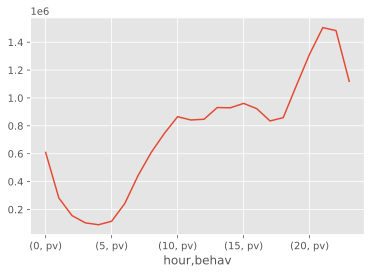

In [9]:
#用户活跃时刻多发生18：00到23：00;
#12：00到次日5：00为活跃低谷
#早10点以后直至18点维持相对平稳的流量
df1 = df[df['behav']=='pv']
df1.groupby(['hour','behav']).size().plot()

<AxesSubplot:xlabel='hour'>

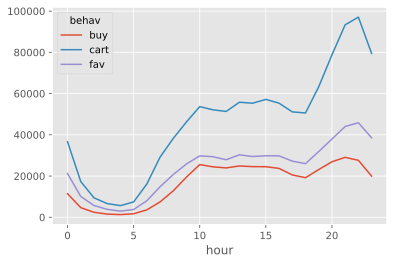

In [10]:
#购买、收藏、加入购物车也呈现如下分布特征
df1 = df[df['behav'].isin(['cart','buy','fav'])]
df1.groupby(['hour','behav']).size().unstack().plot()

## *2.哪类商品购买率最高，购买率top10*

In [11]:
#寻找购买率最高的前10商品类别
df1 = df.groupby(['category','behav'])['category'].size().unstack()
df1['buy_ratio']=df1['buy']/df1.sum(axis=1)
df1.sort_values(by='buy_ratio',ascending=False).head(10)

behav,buy,cart,fav,pv,buy_ratio
category,,,,,
2923285,149.0,NaN,NaN,NaN,1.0
4630498,1.0,NaN,NaN,NaN,1.0
5004150,1.0,NaN,NaN,NaN,1.0
629741,1.0,NaN,NaN,NaN,1.0
748535,1.0,NaN,NaN,NaN,1.0
4349434,1.0,NaN,NaN,NaN,1.0
2100207,1.0,NaN,NaN,NaN,1.0
3995889,1.0,NaN,NaN,NaN,1.0
4308856,1.0,NaN,NaN,NaN,1.0


#  日活


## 1.访问量和独立访客

In [12]:
pv = df.groupby('date')['userID'].count()
pv

date
2017-11-25    2070078
2017-11-26    2124383
2017-11-27    2012639
2017-11-28    1975749
2017-11-29    2047138
2017-11-30    2087264
2017-12-01    2167368
2017-12-02    2762194
2017-12-03    2742393
Name: userID, dtype: int64

In [13]:
uv = df.groupby('date')['userID'].apply(lambda x:x.drop_duplicates().count())
uv

date
2017-11-25    141436
2017-11-26    143267
2017-11-27    142100
2017-11-28    142232
2017-11-29    144101
2017-11-30    146372
2017-12-01    148206
2017-12-02    194450
2017-12-03    193780
Name: userID, dtype: int64

## 2.商品类目、商品数量

In [14]:
unique_user = df.userID.nunique()    #UV
unique_ID = df.ID.nunique()         #商品数量
unique_category = df.category.nunique() #商品类目
print(f"UV:{unique_user}")
print(f"商品数量为:{unique_ID}")
print(f"商品类目数量为：{unique_category}")

UV:198001
商品数量为:2208950
商品类目数量为：8562


## 3.付费用户数，付费用户占比


In [15]:
userbuy_amount = df[df['behav']=='buy'].userID.nunique() #付费用户数
# usernobuy = unique_user - userbuy_amount
print(f"付费用户数：{userbuy_amount}")
print(f"付费用户占比：{userbuy_amount/unique_user*100:.2f}%")

付费用户数：134982
付费用户占比：68.17%


In [18]:
# import os
# os.chdir(r'kaggle/working')
from IPython.display import FileLink
FileLink(r'/kaggle/working/output.zip')

/kaggle/working/output.zip